### Tommaso Armadillo matr. 885460

# <span style="color:red"> Numerical Exercise 12</span>

## <span style="color:blue"> Exercise 12.1</span>
#### Scope

The goal of exercise 12 is to use deep neural network models, implemented in the Keras python package, to recognize and distinguish between the ten handwritten digits (0-9).
The MNIST dataset comprises  70000 handwritten digits, each of which comes in a square image, divided into a  28×28 pixel grid. Every pixel can take on  256 gradation of the gray color, interpolating between white and black, and hence each data point assumes any value in the set  {0,1,…,255}. Since there are  10 categories in the problem, corresponding to the ten digits, this problem represents a generic classification task.
  
By keeping fixed all the other parameters, try to use at least two other optimizers, different from SGD. Watch to accuracy and loss for training and validation data and comment on the performances.

In [1]:
import tensorflow as tf
from tensorflow import keras
import os
import numpy as np
import matplotlib.pyplot as plt
seed=0
np.random.seed(seed) # fix random seed
tf.set_random_seed(seed)

Import MINST dataset:

In [2]:
from keras.datasets import mnist

# input image dimensions
img_rows, img_cols = 28, 28 # number of pixels 
# output
num_classes = 10 # 10 digits

# the data, split between train and test sets
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print()
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

Using TensorFlow backend.


11493376/11490434 [==============================] - 7s 1us/step
X_train shape: (60000, 28, 28)
Y_train shape: (60000,)

60000 train samples
10000 test samples


an example of a data point with label 5


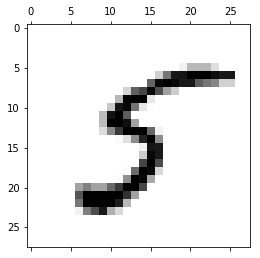

an example of a data point with label 5 before to_categorical ...
... and with label [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.] after to_categorical

X_train shape: (60000, 784)
Y_train shape: (60000, 10)


In [3]:
# reshape data, it could depend on Keras backend
X_train = X_train.reshape(X_train.shape[0], img_rows*img_cols)
X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)

# cast floats to single precesion
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# rescale data in interval [0,1]
X_train /= 255
X_test /= 255

# look at an example of data point
print('an example of a data point with label', Y_train[543])
# matshow: display a matrix in a new figure window
plt.matshow(X_train[543,:].reshape(28,28),cmap='binary')
plt.show()

print('an example of a data point with label', Y_train[543], 'before to_categorical ...')
# convert class vectors to binary class matrices, e.g. for use with categorical_crossentropy
Y_train = keras.utils.to_categorical(Y_train, num_classes)
Y_test = keras.utils.to_categorical(Y_test, num_classes)
print('... and with label', Y_train[543], 'after to_categorical')
print()
print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)

We now create a Dense Neural Network:

In [4]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

def create_DNN():
    # instantiate model
    model = Sequential()
    # add a dense all-to-all relu layer
    model.add(Dense(400,input_shape=(img_rows*img_cols,), activation='relu'))
    # add a dense all-to-all relu layer
    model.add(Dense(100, activation='relu'))
    # apply dropout with rate 0.5
    model.add(Dropout(0.5))
    # soft-max layer
    model.add(Dense(num_classes, activation='softmax'))
    
    return model

print('Model architecture created successfully!')

Model architecture created successfully!


Now we choose loss function $\to$ categorical_crossentropy since this is a classification problem and optimizer $\to$ Stocastich gradient descend

In [5]:
from keras.optimizers import SGD, Adam, RMSprop, Adagrad, Adadelta, Adam, Adamax, Nadam

def compile_model():
    # create the model
    model=create_DNN()
    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=SGD(),
                  metrics=['accuracy'])
    return model

print('Model compiled successfully and ready to be trained.')

Model compiled successfully and ready to be trained.


In [7]:
# training parameters
batch_size = 32
epochs = 5

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

# create the deep neural net
model_DNN = compile_model()

# train DNN and store training info in history
history = model_DNN.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 8s 126us/step - loss: 0.7585 - acc: 0.7783 - val_loss: 0.3098 - val_acc: 0.9114
Epoch 2/5
60000/60000 [==============================] - 8s 131us/step - loss: 0.3815 - acc: 0.8921 - val_loss: 0.2394 - val_acc: 0.9289
Epoch 3/5
60000/60000 [==============================] - 7s 121us/step - loss: 0.3093 - acc: 0.9126 - val_loss: 0.2016 - val_acc: 0.9399
Epoch 4/5
60000/60000 [==============================] - 7s 116us/step - loss: 0.2649 - acc: 0.9259 - val_loss: 0.1789 - val_acc: 0.9473
Epoch 5/5
60000/60000 [==============================] - 7s 121us/step - loss: 0.2353 - acc: 0.9348 - val_loss: 0.1572 - val_acc: 0.9523


After the training let's evaluate the loss and the accuracy

10000/10000 [==============================] - 0s 39us/step

Test loss: 0.1572033528536558
Test accuracy: 0.9523


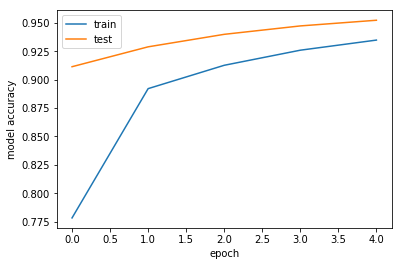

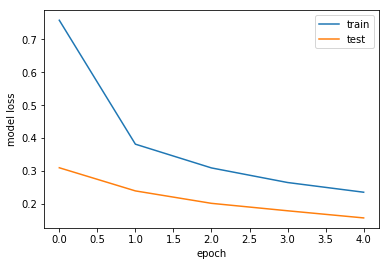

In [8]:
# evaluate model
score = model_DNN.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# look into training history

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

So after only 5 epochs we get an accuracy of $95\%$

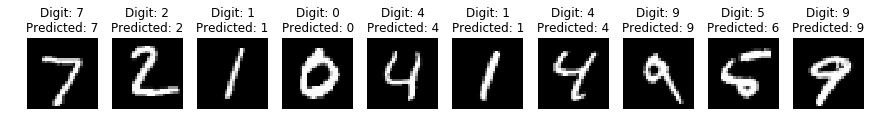

In [9]:
X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)
predictions = model_DNN.predict(X_test)

X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)

plt.figure(figsize=(15, 15)) 
for i in range(10):    
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(X_test[i, :, :, 0], cmap='gray')    
    plt.title("Digit: {}\nPredicted: {}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))    
    plt.axis('off') 
plt.show()

So we see that the only digit out of these ten that out NN didn't recognise properly was the second to last, a 5, which can e easily confused with a 6 since it is bad written.

### Other optimizers
We can also use different optimizers and see how cost, accuracy and training time for epochs change.

##### SGD 
- Test loss: 0.15425841816812755
- Test accuracy: 0.9535
- Training time for epoch 11/12 s
        
##### Adam 
- Test loss: 0.07529104935149954
- Test accuracy: 0.9783
- Training time for epoch 18/19 s 

Slower than the other but it gives the best results.
        
##### RMSprop 
- Test loss: 0.15532558266671803
- Test accuracy: 0.9736
- Training time for epoch 17/18 s 
            
##### Adagrad 
- Test loss: 0.0833731407161802
- Test accuracy: 0.9739
- Training time for epoch 15/16 s

##### Adadelta 
- Test loss: 0.08736245089390868
- Test accuracy: 0.9753
- Training time for epoch 21/23 s

So the most common optimizer, **SGD**, is not the best in terms of results, but it is the best in terms of training time for epoch. **Adagrad** has a very good tast loss, an accuracy of more than $97\%$ and a short training time for epoch.

### Exercise 12.2

#### Scope
This particoular categorical problem has invariance under translation, so it is better to use a Convolutional Neural Network.

In [23]:
# you will need the following for Convolutional Neural Networks
from keras.layers import Flatten, Conv2D, MaxPooling2D

# reshape data, depending on Keras backend
if keras.backend.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
    
print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print()
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (60000, 28, 28, 1)
Y_train shape: (60000, 10)

60000 train samples
10000 test samples


In [24]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

def create_CNN():
    # instantiate model
    model = Sequential()
    # add first convolutional layer with 10 filters (dimensionality of output space)
    model.add(Conv2D(10, kernel_size=(5, 5),
                     activation='relu',
                     input_shape=input_shape))
    
    model.add(MaxPooling2D(pool_size=(2,2),
                            strides=2,
                            padding='valid'))
    
    model.add(Conv2D(20, kernel_size=5,
                     strides=2,
                     activation='tanh'))
    model.add(MaxPooling2D(pool_size=(2,2),
                            strides=2,
                            padding='valid'))
    model.add(Flatten())
    model.add(Dense(400, activation='relu'))
    
    # add a dense all-to-all relu layer
    model.add(Dense(100, activation='relu'))
    model.add(Dropout(0.5))
    
    # soft-max layer
    model.add(Dense(num_classes, activation='softmax'))
    
    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer='Adagrad',
                  metrics=['accuracy'])
    return model

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 22s 364us/step - loss: 0.2128 - acc: 0.9379 - val_loss: 0.0762 - val_acc: 0.9766
Epoch 2/5
60000/60000 [==============================] - 21s 352us/step - loss: 0.0983 - acc: 0.9721 - val_loss: 0.0567 - val_acc: 0.9828
Epoch 3/5
60000/60000 [==============================] - 21s 355us/step - loss: 0.0788 - acc: 0.9776 - val_loss: 0.0510 - val_acc: 0.9845
Epoch 4/5
60000/60000 [==============================] - 21s 357us/step - loss: 0.0667 - acc: 0.9809 - val_loss: 0.0475 - val_acc: 0.9862
Epoch 5/5
10000/10000 [==============================] - 2s 161us/step

Test loss: 0.044459787514986235
Test accuracy: 0.9862


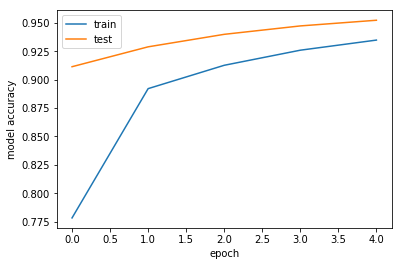

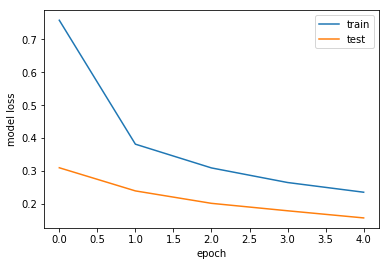

In [28]:
# training parameters
batch_size = 32
epochs = 5

# create the deep conv net
model_CNN=create_CNN()

# train CNN
model_CNN.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))

# evaliate model
score = model_CNN.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

We used the Adagard optimizers becuase we saw in the previous point of the exercise that it's quick and it gives high accuracy and low loss. We can be satisfied for an accuracy of more than $98\%$! 

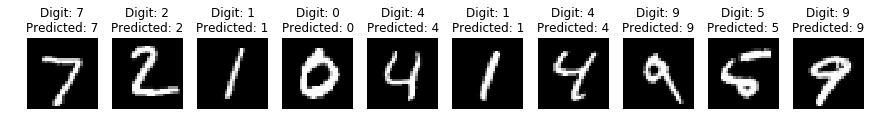

In [27]:
#X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)
predictions = model_CNN.predict(X_test)

X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)

plt.figure(figsize=(15, 15)) 
for i in range(10):    
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(X_test[i, :, :, 0], cmap='gray')    
    plt.title("Digit: {}\nPredicted: {}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))    
    plt.axis('off') 
plt.show()

This time the CNN recognised the 5. 

### Exercise 12.3

Use the gimp application to create 10 pictures of your "handwritten" digits, import them in your jupyter-notebook and try to see if your CNN is able to recognize your handwritten digits.

First of all we create the handwritten digits:

Image size: 28x28


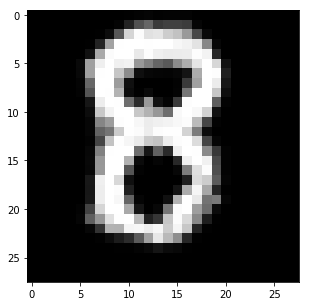

(28, 28)


In [47]:
from PIL import Image
import os

digit_filename = "./Digits/digit8.png"
digit_in = Image.open(digit_filename).convert('L')

ydim, xdim = digit_in.size
print("Image size: "+str(xdim)+"x"+str(ydim))
pix=digit_in.load();
data = np.zeros((xdim, ydim))
for j in range(ydim):
    for i in range(xdim):
        data[i,j]=pix[j,i]

data /= 255

plt.figure(figsize=(5,5))
plt.imshow(data, cmap='gray')
plt.show()

print(data.shape)

For example this is my 8.

<Figure size 1080x1080 with 0 Axes>

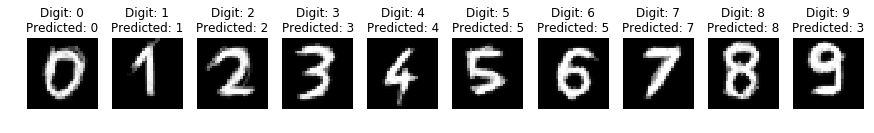

In [46]:
plt.figure(figsize=(15, 15)) 

for l in range(10):
    digit_in = Image.open(f'Digits/digit{l}.png').convert('L')
    ydim, xdim = digit_in.size
    pix=digit_in.load();
    data = np.zeros((xdim, ydim))
    for j in range(ydim):
        for i in range(xdim):
            data[i,j]=pix[j,i]
    data /= 255
    ax = plt.subplot(2, 10, l + 1)
    plt.imshow(data, cmap='gray')
    data = data.reshape(1, img_rows, img_cols, 1)
    predicted = model_CNN.predict(data)
    plt.title(f"Digit: {l}\nPredicted: {np.argmax(predicted)}")    
    plt.axis('off')
plt.show()

The CNN has a difficulty in distinguish 6 from 5 because they have a similar shape. For the same reason the 9 was recognised to be a 3.